## CS156A Homework 2
## Wilson Duan

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import LinearRegression
random.seed(123)

In [2]:
num_simulations = 1000
num_coins = 1000
num_flips = 10

v_1 = np.zeros(num_simulations)
v_rand = np.zeros(num_simulations)
v_min = np.zeros(num_simulations)

for i in range(num_simulations):
    flips = np.zeros(num_coins)
    for j in range(num_coins):
        counter = 0.0
        for k in range(num_flips):
            counter += random.randint(0, 1) 
        flips[j] = float(counter) / num_flips
    v_1[i] = flips[0]
    v_rand[i] = flips[random.randint(0, num_coins-1)]
    v_min[i] = np.min(flips)

print(f'Average value of v_1: {np.mean(v_1)}')
print(f'Average value of v_rand: {np.mean(v_rand)}')
print(f'Average value of v_min: {np.mean(v_min)}')

Average value of v_1: 0.5012000000000001
Average value of v_rand: 0.49979999999999997
Average value of v_min: 0.036399999999999995


### Problem 1. 
The average value of $v_{min}$ is equal to 0.0373, which is closest to **b) 0.01.**

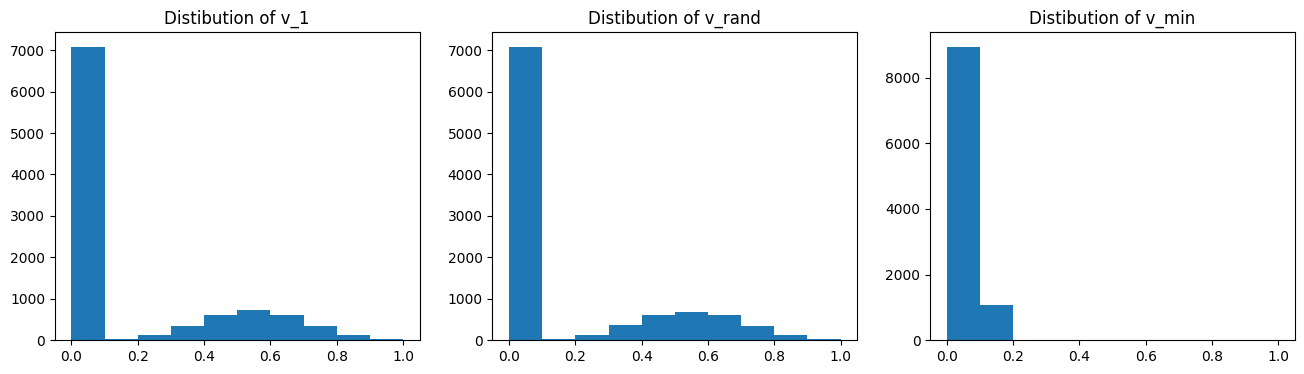

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].hist(v_1, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title("Distibution of v_1")

ax[1].hist(v_rand, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[1].set_title("Distibution of v_rand")

ax[2].hist(v_min, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[2].set_title("Distibution of v_min")
plt.show()

### Problem 2.
The probability distributions of coins $c_1$ and $c_{rand}$ are roughly binomial, meaning the deviation from the expected number of heads decreases exponentially with the number of tosses. On the other hand, the distribution of $c_{min}$ is two bars at 0.0 and 0.1, which is not binomial. As a result, $c_1$ and $c_{rand}$ satisfy the Hoeffding Inequality and $c_{min}$ does not, so the answer is **d)**.

### Problem 3.
$$P(\text{$h$ makes an error predicting y}) = P(\text{$f$ predicts y correctly}) * P(\text{$h$ predicts $f$ incorrectly})$$
$$+ P(\text{$f$ predicts y incorrectly}) * P(\text{$h$ predicts $f$ correctly}) = \lambda * \mu + (1 - \lambda) * (1 - \mu).$$

Therefore, the answer is **e)**.

### Problem 4.
We analyze the equation dictating the error of h: $\lambda * \mu + (1 - \lambda) * (1 - \mu) = \lambda * \mu + 1 - \lambda - \mu + \lambda * \mu = 2 \lambda * \mu + 1 - \lambda - \mu = (2 \lambda - 1) * \mu + 1 - \lambda$. The $\mu$ term becomes negated when $2 \lambda - 1 = 0$, which occurs when $\lambda = 0.5$. As a result, the performance of $h$ is independent of $\mu$ when $\lambda = 0.5$, and the answer is **b)**. 

In [4]:
# Define a set of helper functions
def random_point():
    x = random.random() * 2 - 1
    y = random.random() * 2 - 1
    return (x, y)

def random_line():
    x1, y1 = random_point()
    x2, y2 = random_point()

    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return (slope, intercept)

def evaluate_point(slope, intercept, x, y):
    if (slope * x + intercept > y):
        return -1
    return 1

def PLA_predict(weights, x, y):
    return np.sign(weights[0] + weights[1] * x + weights[2] * y)

def predict(weights, X):
    return np.sign(weights[0] + weights[1] * X[:, 0] + weights[2] * X[:, 1])

In [5]:
def create_dataset(n, slope, intercept):
    X = []
    y = []
    for i in range(n):
        a, b = random_point()
        X.append([a, b])
        y.append(evaluate_point(slope, intercept, a, b))
    return np.array(X), np.array(y)

In [6]:
num_simulations = 1000
N = 100

E_ins = np.zeros(num_simulations)
E_outs = np.zeros(num_simulations)
for i in range(num_simulations):
    slope, intercept = random_line()
    X_train, y_train = create_dataset(N, slope, intercept)
    X_test, y_test = create_dataset(1000, slope, intercept)

    # train regression
    reg = LinearRegression().fit(X_train, y_train)
    weights = np.append(reg.intercept_, reg.coef_)


    # evaluate in sample performance
    E_in = np.mean(predict(weights, X_train) != y_train)
    E_ins[i] = E_in

    # evaluate out of sample performance
    E_out = np.mean(predict(weights, X_test) != y_test)
    E_outs[i] = E_out

print(f'Average E_in: {np.mean(E_ins)}')
print(f'Average E_out: {np.mean(E_outs)}')

Average E_in: 0.038990000000000004
Average E_out: 0.04812100000000001


### Problem 5.
The average $E_{in}$ is 0.0397, which is closest to answer **c)**.

### Problem 6.
The average $E_{out}$ is 0.0492, which is closest to answer **c)**.

In [7]:
num_simulations = 1000
N = 10

iteration_array = np.zeros(num_simulations)
for i in range(num_simulations):
    slope, intercept = random_line()
    X, y = create_dataset(N, slope, intercept)

    # train regression
    reg = LinearRegression().fit(X, y)
    weights = np.append(reg.intercept_, reg.coef_)


    # run PLA
    iterations = 0
    # calibrate weights
    while True:
        misclassified_points = []
        # populate misclassified points
        for ((a, b), label) in zip(X, y):
            prediction = PLA_predict(weights, a, b)
            if (prediction != label):
                misclassified_points.append((a, b, label))

        # check for convergence
        if (len(misclassified_points) == 0):
            break
        else:
            a, b, label = random.choice(misclassified_points)
            weights += label * np.array([1, a, b])
            iterations += 1
    
    iteration_array[i] = iterations

print(f'Average iterations to converge: {np.mean(iteration_array)}')

Average iterations to converge: 4.423


### Problem 7.
The average iterations it takes to converge is 4.289, which is closest to answer choice **a) 1**.

In [ ]:
def target_function(a, b):
  return np.sign(a * a + b * b - 0.6)

def create_transformation_dataset(n, noise = True):
    X = []
    y = []
    for i in range(n):
        a, b = random_point()
        X.append([a, b])
        y.append(target_function(a, b))
    
    X = np.array(X)
    y = np.array(y)
    if (noise):
       y = simulate_noise(y)
    return X, y

def simulate_noise(y):
  subset = int(len(y) / 10)
  mask = np.array([-1] * subset + [1] * (len(y) - subset))
  random.shuffle(mask)
  return y * mask

In [ ]:
num_simulations = 1000
N = 1000

E_ins = np.zeros(num_simulations)
for i in range(num_simulations):
    X, y = create_transformation_dataset(N)

    # train regression
    reg = LinearRegression().fit(X, y)
    weights = np.append(reg.intercept_, reg.coef_)

    # evaluate in sample performance
    E_in = np.mean(predict(weights, X) != y)
    E_ins[i] = E_in

print(f'Average E_in: {np.mean(E_ins)}')

Average E_in: 0.505403


### Problem 8.
The average $E_{in}$ is 0.505, which is closest to answer choice **d)**. 

In [ ]:
def transform(X):
    output = np.zeros((len(X), 5))
    for i, (a, b) in enumerate(X):
        output[i] = np.array([a, b, a * b, a * a, b * b])
    return output

def transform_predict(weights, X):
    return np.sign(weights[0] + weights[1] * X[:, 0] + weights[2] * X[:, 1] + 
                   weights[3] * X[:, 2] + weights[4] * X[:, 3] + weights[5] * X[:, 4])

In [ ]:
num_simulations = 1000
N = 1000

all_weights = np.zeros(6)
for i in range(num_simulations):
    X, y = create_transformation_dataset(N)
    X = transform(X)

    # train regression
    reg = LinearRegression().fit(X, y)
    weights = np.append(reg.intercept_, reg.coef_)

    all_weights += weights

all_weights /= num_simulations
all_weights = list(all_weights)
print(f'Average weights: {all_weights}')

Average weights: [-0.9929184071170881, -8.425915438914182e-05, 3.818554167751773e-05, 6.534790737482246e-05, 1.5573982355691482, 1.5592312627717961]


In [ ]:
g_a = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
g_b = np.array([-1, -0.05, 0.08, 0.13, 1.5, 15])
g_c = np.array([-1, -0.05, 0.08, 0.13, 15, 1.5])
g_d = np.array([-1, -1.5, 0.08, 0.13, 0.05, 0.05])
g_e = np.array([-1, -0.05, 0.08, 1.5, 0.15, 0.15])

# generate 1000 random points
X, y = create_transformation_dataset(1000, noise = False)
X = transform(X)
y = transform_predict(all_weights, X)
agreement_a = np.mean(transform_predict(g_a, X) == y)
agreement_b = np.mean(transform_predict(g_b, X) == y)
agreement_c = np.mean(transform_predict(g_c, X) == y)
agreement_d = np.mean(transform_predict(g_d, X) == y)
agreement_e = np.mean(transform_predict(g_e, X) == y)

agreement_a, agreement_b, agreement_c, agreement_d, agreement_e

(0.967, 0.649, 0.664, 0.613, 0.558)

### Problem 9.
$g_a$ had agreement of 0.967, $g_b$ had agreement of 0.649, $g_c$ had agreement of 0.664, $g_d$ had agreement of 0.613, $g_e$ had agreement of 0.558. The hypothesis with the greatest agreement is $g_a$, so the answer is **a)**.

In [ ]:
num_simulations = 1000
num_points = 1000

E_outs = np.zeros(num_simulations)
for i in range(num_simulations):
    X, y = create_transformation_dataset(num_points)
    X = transform(X)

    E_out = np.mean(transform_predict(all_weights, X) != y)
    E_outs[i] = E_out

print(f'Average E_out: {np.mean(E_outs)}')

Average E_out: 0.123471


### Problem 10.
The average $E_{out}$ is 0.123, which is closest to answer **b)**.